# Let's begin with **The Central Dogma**

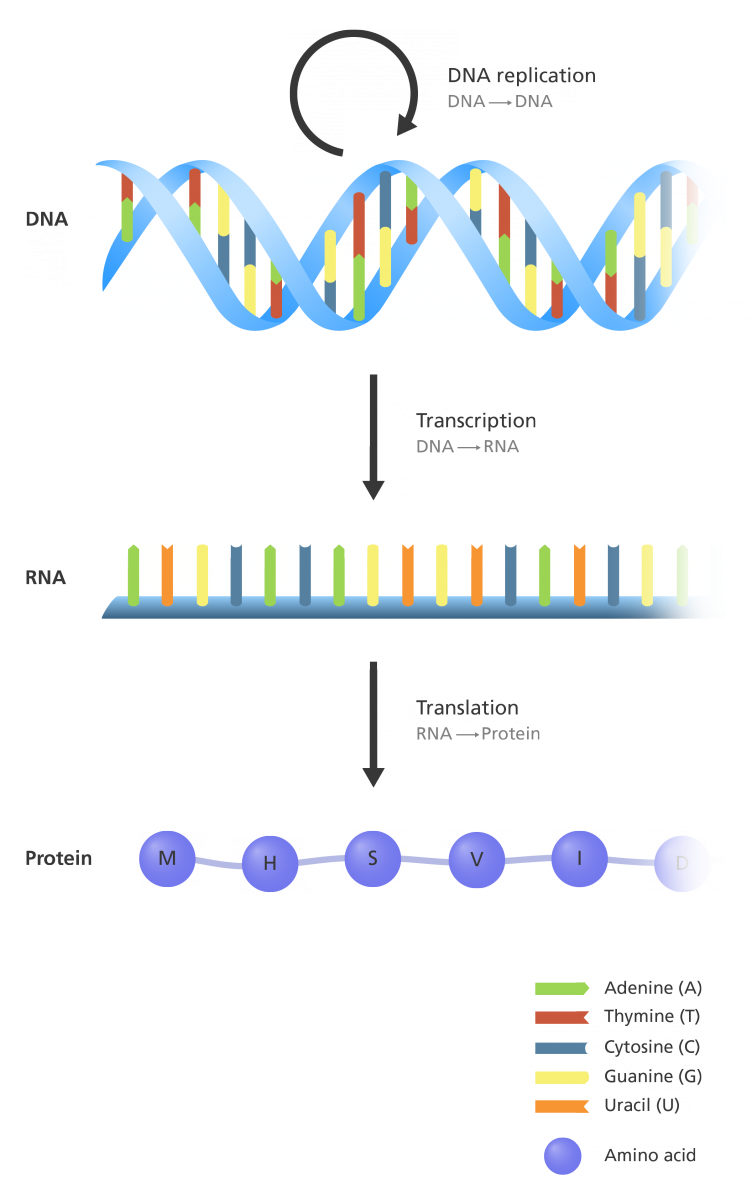

The central dogma details the fundamental principle of molecular biology in which DNA (deoxyribonucleic acid) is first transcribed into RNA (ribonucleic acid) and then translated into active proteins. Every cell in your body contains the exact same copy of DNA. <br> *But what makes each cell type different?* <br>
The answer is gene expression! What distinguishes cell types is the genes that are being expressed. While each cell contains a full copy of DNA, some genes are turned off in some cells, some turned on in others, some expressed more (upregulated genes), and some expressed less (downregulated genes), all in a process called gene regulation.

Gene expression can tell us about what biological pathways are active and in what capacity. One way to do this is through  transcriptomics.


### RNA Transcriptomics

**RNA transcriptomics:**
Genes that are turned on and are actively being expressed must first be translated into RNA through a process called *transcription*. This means that genes that are turned off in a cell are not transcribed.

By analyzing RNA data, scientists can gain insights into how cells work, how diseases form, and how treatments may be effective. It's like exploring a recipe book to see which ingredients are used in different dishes, giving us clues about how things are made and how they function.

Imagine you run a restaurant that only uses recipes from cook books at the library. In order to make a dish, you have to go to the library, make a copy of the recipe in the cook book, leave the library, go back to your restaraunt and then use the copy you made to cook.

In this scenario, the cookbook in the library is the DNA, the copy you make is the messenger RNA (mRNA), the library is the nucleus (the part of the cell where all the DNA is), your kitchen is a protein assebly complex known as a ribosome, and the food you make is the protein.

Now imagine, if every restaraunt in town had to use the same cookbook. How would they be different? Well, each restaraunt would use different parts of the cookbook with some overlap but with significant variation. All the restaraunts would use the recipe for water and bread, but not all the restaraunts would use the ones for lasagna or red curry. Only the Italian and Thai restaraunts would, even though all the restaraunts would use the same cookbook with the lasagna and red curry recipes.

In real life all cells express certain genes that are universally essential, like the parts for basic signalling proteins on cell membranes or the ones that code for ribosomes. In the analogy, it's easy to imagine a cook at a Peurto Rican restaraunt deciding not to use the recipe for fried rice because they know it's not the right type of food for their restaurant, but how do the cells know which parts of the DNA (cookbook) to use?

The answer complex, as there are many ways that gene-expression regulation occurs. It occurs at every step along the DNA -> RNA -> protein sequence, when DNA is trancripted into RNA, when RNA tries to leave the nucleus, when RNA is finding a ribosome, and others.




**About our dataset:**

The data is stored in 4 separate files:


1.   ***annotations.csv*** contains annotation information for each gene.
2.   ***endometriosis_assay_data.csv*** contains:

*   gene accession numbers/genes/probe IDs (unique identifiers assigned to a record in sequence databases for more annotation)
*  

 in the rows and columns are separate sample IDs (each chip is used for processing one person's endometrium lining sample)
3.   ***endometriosis_metadata.csv*** contains
 metadata for each individual (first column are the sample IDs)

4.   ***endometriosis_pca.csv***: PCA data previously calculated -- we can use this for comparison





**Why fully understanding your dataset is important:**

1. Understand what has been already done and where areas of innovation can occur!

2. Understand limitations and what conclusions can be appropriately drawn.

3. It helps to understand the origins, structure, variables and quality of the data so that you can decide on appropriate analysis techniques.

4. Exploring the dataset helps in visualizing the relationships between the variables so that you have a solid understand of the data and its quality to derive reliable and accurate results.

### Literature Review

We don't have all the time to perform a true and thorough literature review for this project but it is very important to understand where this data comes from and what has already been done with it!

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4239429/


**Questions**

    1. What were the goals of the study?
    2. What methods were used?
    3. What are some caveats of microarray data?
    4. What are the advantages and limitations of using microarray technology in assessing gene expression levels in endometriosis compared to Q-RT-PCR?
    5. What are the potential clinical implications of the identified transcriptomics of the patient and controls? How can the above information help in making clinical decisions?








# Let's start looking at our data!

Download the data: https://drive.google.com/drive/folders/1-6Alx2rRk6ivtu8vsiAoHo2sjzw9dVcO?usp=sharing

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Once you've downloaded the data, go into your Google Drive. Acces the 'Shared With Me' tab and add the 'AI4ALL_Data' folder as a shortcut to your 'My Drive'.

# Part 1: Data Exploration and Initial Wrangling

## First, let's load in our libraries and data

We first need to initialize our kernel with the necessary packages to run our programs. This only needs to done once, but must be done everytime you reopen this page!

In [ ]:
# package import block:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
# ignore warnings
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

Set your working directory to be the folder containing the data.

In [ ]:
data_path = "/content/gdrive/MyDrive/AI4ALL_Data"

Let's load in our data!

In [ ]:
data = pd.read_csv(data_path + "/final_assay_data.csv", index_col=0) # for tab you would use sep = "\t"
metadata = pd.read_csv(data_path + "/final_metadata.csv", index_col=0)
annotations = pd.read_csv(data_path + '/annotations.csv', index_col =0)
# metadata has it's sample IDs as ints
# but data has them as strings
# lets make them the same!
metadata.index = metadata.index.astype(str)

Let's take a look at the first 5 columns of our data.

In [ ]:
data.head()

,ID_REF,GSM1256653,GSM1256654,GSM1256655,GSM1256656,GSM1256657,GSM1256658,GSM1256659,GSM1256660,GSM1256661,...,GSM1256791,GSM1256792,GSM1256793,GSM1256794,GSM1256795,GSM1256796,GSM1256797,GSM1256798,GSM1256799,GSM1256800
1,1007_s_at,9.142574,9.063049,8.371274,10.328161,9.053309,9.826959,10.051266,8.916482,9.512921,...,9.422857,9.509318,8.911136,8.910045,9.688327,8.945505,9.914873,8.360163,9.019321,9.133539
2,1053_at,6.829346,7.241591,6.217500,5.956927,7.327925,6.756618,6.002931,7.174114,7.176087,...,6.953829,6.588734,7.550706,7.233786,7.124303,7.176087,7.015061,7.382790,7.294270,7.455280
3,117_at,2.415871,2.481975,3.000367,2.481975,2.565015,3.424743,3.228950,2.523481,2.481975,...,2.489401,2.813569,2.381507,2.504751,12.746832,2.405781,2.539794,2.689892,2.408022,2.481975
4,121_at,9.034042,9.148342,8.194835,11.259729,7.999834,11.024787,11.493178,8.627861,8.650235,...,10.362475,9.529804,7.771715,8.190530,9.513292,7.430179,10.641842,7.542483,7.394785,7.345726
5,1255_g_at,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,...,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067


Each row corresponds to each probe id.

Columns refer to each patient.

Each value is each patient's expression level for each gene.


Let's look at the metadata.

In [ ]:
metadata.head()

,sample,disease,phase,severity,pathology
1,GSM1256800,Non-Endometriosis,Proliferative Endometrial tissue,not specified,No Uterine Pelvic Pathology
2,GSM1256799,Non-Endometriosis,Proliferative Endometrial tissue,not specified,No Uterine Pelvic Pathology
3,GSM1256798,Non-Endometriosis,Proliferative Endometrial tissue,not specified,No Uterine Pelvic Pathology
4,GSM1256797,Non-Endometriosis,Mid-Secretory Endometrial tissue,not specified,No Uterine Pelvic Pathology
5,GSM1256796,Non-Endometriosis,Proliferative Endometrial tissue,not specified,No Uterine Pelvic Pathology


Each row corresponds to each patient

Columns

* 'sample': each patient
* 'disease': whether or not the patient has endometriosis
* 'phase': phase of menstrual cycle
* 'severity': endometriosis severity
* 'pathology': whether or not the patient has uterine/pelvic pathology




Finally, we'll look at the annotations.

In [ ]:
annotations.head()

,affy_hg_u133_plus_2,ensembl_gene_id,gene_biotype,external_gene_name,interpro_description,chromosome_name,start_position,end_position,band
1,1553551_s_at,ENSG00000198888,protein_coding,MT-ND1,"NADH:ubiquinone oxidoreductase, subunit 1/F420...",MT,3307,4262,NaN
2,1553551_s_at,ENSG00000198888,protein_coding,MT-ND1,"NADH:ubiquinone oxidoreductase, subunit 1, con...",MT,3307,4262,NaN
3,1553551_s_at,ENSG00000198763,protein_coding,MT-ND2,"NADH:quinone oxidoreductase/Mrp antiporter, me...",MT,4470,5511,NaN
4,1553551_s_at,ENSG00000198763,protein_coding,MT-ND2,"NADH:ubiquinone oxidoreductase, chain 2",MT,4470,5511,NaN
5,1553551_s_at,ENSG00000198763,protein_coding,MT-ND2,"NADH dehydrogenase subunit 2, C-terminal",MT,4470,5511,NaN


Each row corresponds to each probe id.

Columns
* affy_hg_u133_plus_2: probe id from the microarray
* ensembl_gene_id: gene ID to get information from ENSEMBL, a large gene database with information on the genes!
*   gene_biotype: gene function
*   external_gene_name: gene name
*   interpro_description: gene function information
*   chromosome_name: the chromosome it is located on (MT is mitochondrial)
*   start_position: starting position of the gene on the chromosome
*   end_position: ending position of the gene on the chromosome
*   band: position of the gene, which band of the chromosome the gene is located


**Questions:**
    
    1. How many patients are in the 'metadata' DataFrame?
    2. How many probe ids are in the 'data' DataFrame?
    3. How many probe ids are in the 'annotations' DataFrame?

## Data Visualization Exercises

EXERCISE:
1.  Make a bar chart comparing the number of endometriosis and non-endometriosis samples. (hint use the metadata DataFrame)

2. Make a bar chart comparing the counts of all different 'pathology' groups.

*Don't forget to label your axes and title your plots!*


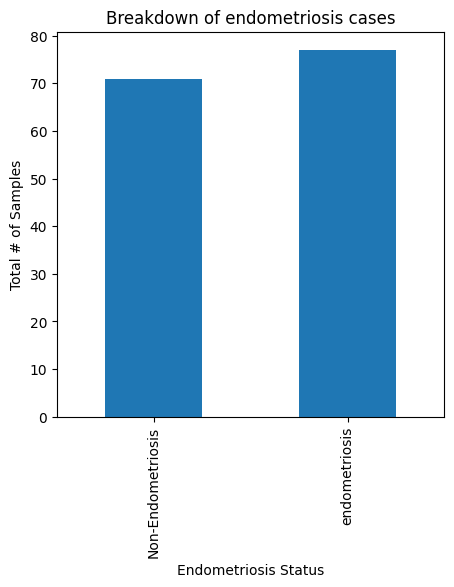

In [ ]:
count_by_endometriosis_status = metadata.groupby(['disease']).size()
count_by_endometriosis_status.plot.bar(x="index",figsize=(5,5),legend=False)
# setting labels make plots more informative
plt.xlabel("Endometriosis Status")
plt.ylabel("Total # of Samples")
# titles are important for plot interpretation!
plt.title("Breakdown of endometriosis cases")
plt.show()

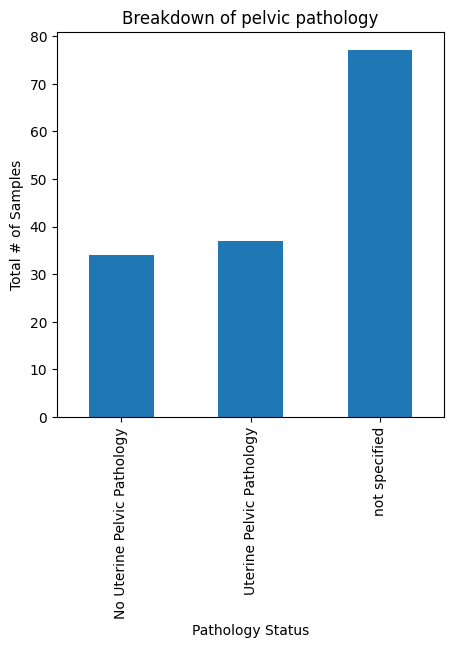

In [ ]:
count_by_pathology = metadata.groupby(['pathology']).size()
count_by_pathology.plot.bar(y="index",figsize=(5,5),legend=False)
# setting labels make plots more informative
plt.xlabel("Pathology Status")
plt.ylabel("Total # of Samples")
# titles are important for plot interpretation!
plt.title("Breakdown of pelvic pathology")
plt.show()

**Questions**

    1. Is our dataset balanced when it comes to non-endometriosis vs endometriosis groups?
    

## Data Exploration Exercises

EXERCISE:
1. It could be interesting to see how gene expression changes across patients. Plot the expression levels of 3 genes (3 different plots) for all the patients. *(hint:* [try starting here](https://seaborn.pydata.org/generated/seaborn.barplot.html))

2. Let's get an idea of how gene expression changes between groups. Plot the **average** gene expression for 3 different genes for endometriosis and non-endometriosis patients.

Text(0.5, 1.0, 'expression level for gene ___ across patients')

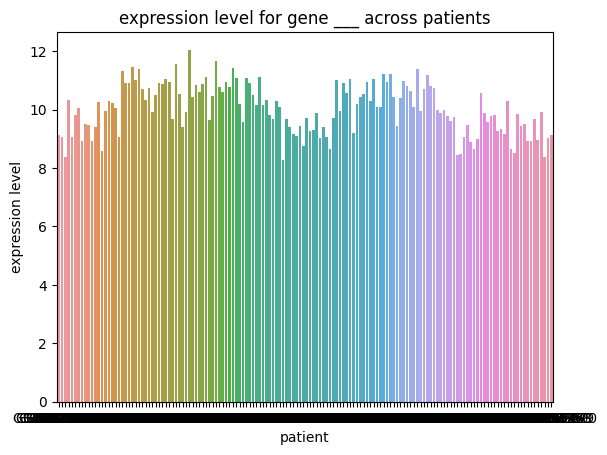

In [ ]:
sns.barplot(x = data.columns[1:], y=data.iloc[0,1:])
plt.xlabel('patient')
plt.ylabel('expression level')
plt.title('expression level for gene ___ across patients')

In [ ]:
nonendo_patients

NameError: ignored

In [ ]:
nonendo_patients = metadata[metadata['disease'] == 'Non-Endometriosis']
endo_patients = metadata[metadata['disease'] == 'endometriosis']

In [ ]:
nonendo_data = data[nonendo_patients['sample'].tolist()]
endo_data = data[endo_patients['sample'].tolist()]

In [ ]:
nonendo_data.iloc[0].mean()
endo_data.iloc[0].mean()
[nonendo_data.iloc[0].mean(), endo_data.iloc[0].mean()]

[9.845894447647888, 10.19274839587013]

In [ ]:
metadata['disease'].unique()

array(['Non-Endometriosis', 'endometriosis'], dtype=object)

Text(0.5, 1.0, 'Expression of gene___for endo vs nonendo')

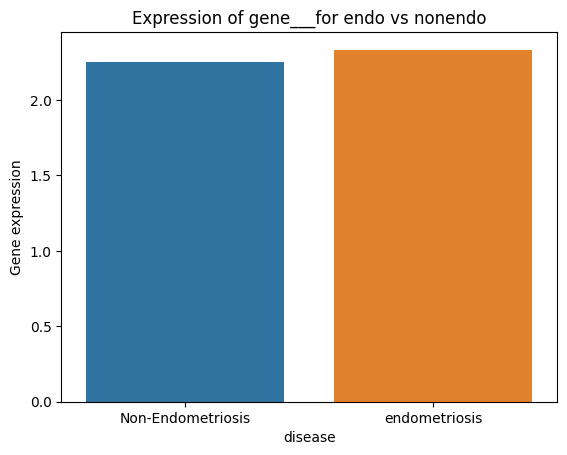

In [ ]:
sns.barplot(y = [nonendo_data.iloc[12].mean(), endo_data.iloc[12].mean()], x = count_by_endometriosis_status.index )
plt.ylabel('Gene expression')
plt.title('Expression of gene___for endo vs nonendo')

In [ ]:
count_by_endometriosis_status.index

Index(['Non-Endometriosis', 'endometriosis'], dtype='object', name='disease')

In [ ]:
metadata.iloc[0:1]

,sample,disease,phase,severity,pathology
1,GSM1256800,Non-Endometriosis,Proliferative Endometrial tissue,not specified,No Uterine Pelvic Pathology


EXERCISE:
1. Check for missing values in the data and metadata.



In [ ]:
#Checking for missing values
missing_values = metadata.index.isnull().any()
print("Missing values:", missing_values)

# If missing values are present, remove them using
metadata_cleaned = metadata.dropna()

Missing values: False


# Part 2: Building Our Classifier

 We will be comparing the performances of 3 algorithms:

*   [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic%20regression#sklearn.linear_model.LogisticRegression)
*   [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=random%20forest#sklearn.ensemble.RandomForestClassifier)
*   [Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)



 We will be building our classifier to distinguish between the patient groups:


1.   Healthy controls
2.   No endometriosis with uterine/pelvic pathology
3. Endometriosis



In [ ]:
metadata['phase'].unique()

array(['Proliferative Endometrial tissue',
       'Mid-Secretory Endometrial tissue',
       'Late Secretory Endometrial tissue',
       'Early Secretory Endometrial tissue', 'Unknown'], dtype=object)

**Question:**


    1.   What will be our input features into our models?



In [ ]:
metadata_phase

,sample,disease,phase,severity,pathology
6,GSM1256795,Non-Endometriosis,Late Secretory Endometrial tissue,not specified,Uterine Pelvic Pathology
18,GSM1256783,Non-Endometriosis,Late Secretory Endometrial tissue,not specified,Uterine Pelvic Pathology


Let's get started!

# Partition out assigned menstrual phase data

In [ ]:
# Find all the possible phases
#complete code
metadata['phase'].unique()

array(['Proliferative Endometrial tissue',
       'Mid-Secretory Endometrial tissue',
       'Late Secretory Endometrial tissue',
       'Early Secretory Endometrial tissue', 'Unknown'], dtype=object)

Select data with assigned phase (both 'metadata' and 'data' DataFrames)

In [ ]:
metadata_phase = metadata[metadata['phase']== 'Early Secretory Endometrial tissue']

In [ ]:
metadata_phase

,sample,disease,phase,severity,pathology
9,GSM1256792,Non-Endometriosis,Early Secretory Endometrial tissue,not specified,Uterine Pelvic Pathology
11,GSM1256790,Non-Endometriosis,Early Secretory Endometrial tissue,not specified,Uterine Pelvic Pathology
14,GSM1256787,Non-Endometriosis,Early Secretory Endometrial tissue,not specified,No Uterine Pelvic Pathology
23,GSM1256778,endometriosis,Early Secretory Endometrial tissue,Minimal/Mild,not specified
25,GSM1256776,endometriosis,Early Secretory Endometrial tissue,Minimal/Mild,not specified
27,GSM1256774,endometriosis,Early Secretory Endometrial tissue,Minimal/Mild,not specified
36,GSM1256765,Non-Endometriosis,Early Secretory Endometrial tissue,not specified,Uterine Pelvic Pathology
37,GSM1256764,Non-Endometriosis,Early Secretory Endometrial tissue,not specified,Uterine Pelvic Pathology
49,GSM1256752,Non-Endometriosis,Early Secretory Endometrial tissue,not specified,Uterine Pelvic Pathology
50,GSM1256751,Non-Endometriosis,Early Secretory Endometrial tissue,not specified,Uterine Pelvic Pathology


In [ ]:
test = metadata_phase['sample'].tolist()
test.insert(0, 'ID_REF')

In [ ]:
data_phase =  data[test]

In [ ]:
data_phase

,ID_REF,GSM1256792,GSM1256790,GSM1256787,GSM1256778,GSM1256776,GSM1256774,GSM1256765,GSM1256764,GSM1256752,...,GSM1256705,GSM1256701,GSM1256695,GSM1256687,GSM1256681,GSM1256667,GSM1256661,GSM1256657,GSM1256654,GSM1256653
1,1007_s_at,9.509318,9.834192,10.277842,8.976783,8.872928,9.059905,10.746280,10.814340,11.225339,...,11.435619,10.768957,10.592488,9.674620,9.910229,9.942681,9.512921,9.053309,9.063049,9.142574
2,1053_at,6.588734,6.630619,7.361680,6.558264,6.725753,6.467251,8.042911,6.749442,6.937814,...,7.341458,7.051648,6.982975,7.088252,7.176087,7.261210,7.176087,7.327925,7.241591,6.829346
3,117_at,2.813569,7.305375,2.479999,2.481975,2.486904,3.383894,2.457212,2.468267,2.424072,...,2.696951,2.402441,4.135251,2.508270,5.578537,2.405781,2.481975,2.565015,2.481975,2.415871
4,121_at,9.529804,8.362055,8.096299,9.176650,8.955522,8.069919,9.408341,9.011973,9.622624,...,9.822029,9.791808,9.110232,9.070996,9.129036,8.898449,8.650235,7.999834,9.148342,9.034042
5,1255_g_at,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,...,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54671,AFFX-ThrX-5_at,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,...,2.236067,2.236067,2.236067,2.236067,2.399022,2.236067,2.236067,2.236067,2.236067,2.236067
54672,AFFX-ThrX-M_at,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,...,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067
54673,AFFX-TrpnX-3_at,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,...,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067
54674,AFFX-TrpnX-5_at,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,...,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067


## Let's format our output
Most machine learning algorithms only work with numerical values. So we need to convert our output from strings to a numerical format that our  algorithms can understand.

So let's make:

0 = Healthy controls

1 = No endometriosis with uterine/pelvic pathology

2 = Endometriosis


In [ ]:
data[metadata_phase['sample'].tolist()]

,GSM1256792,GSM1256790,GSM1256787,GSM1256778,GSM1256776,GSM1256774,GSM1256765,GSM1256764,GSM1256752,GSM1256751,...,GSM1256705,GSM1256701,GSM1256695,GSM1256687,GSM1256681,GSM1256667,GSM1256661,GSM1256657,GSM1256654,GSM1256653
1,9.509318,9.834192,10.277842,8.976783,8.872928,9.059905,10.746280,10.814340,11.225339,10.930937,...,11.435619,10.768957,10.592488,9.674620,9.910229,9.942681,9.512921,9.053309,9.063049,9.142574
2,6.588734,6.630619,7.361680,6.558264,6.725753,6.467251,8.042911,6.749442,6.937814,8.011128,...,7.341458,7.051648,6.982975,7.088252,7.176087,7.261210,7.176087,7.327925,7.241591,6.829346
3,2.813569,7.305375,2.479999,2.481975,2.486904,3.383894,2.457212,2.468267,2.424072,2.521051,...,2.696951,2.402441,4.135251,2.508270,5.578537,2.405781,2.481975,2.565015,2.481975,2.415871
4,9.529804,8.362055,8.096299,9.176650,8.955522,8.069919,9.408341,9.011973,9.622624,8.783091,...,9.822029,9.791808,9.110232,9.070996,9.129036,8.898449,8.650235,7.999834,9.148342,9.034042
5,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,...,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54671,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,...,2.236067,2.236067,2.236067,2.236067,2.399022,2.236067,2.236067,2.236067,2.236067,2.236067
54672,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,...,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067
54673,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,...,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067
54674,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,...,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067


In [ ]:
metadata_phase.head()

,sample,disease,phase,severity,pathology,ml_output
9,GSM1256792,Non-Endometriosis,Early Secretory Endometrial tissue,not specified,Uterine Pelvic Pathology,1
11,GSM1256790,Non-Endometriosis,Early Secretory Endometrial tissue,not specified,Uterine Pelvic Pathology,1
14,GSM1256787,Non-Endometriosis,Early Secretory Endometrial tissue,not specified,No Uterine Pelvic Pathology,0
23,GSM1256778,endometriosis,Early Secretory Endometrial tissue,Minimal/Mild,not specified,2
25,GSM1256776,endometriosis,Early Secretory Endometrial tissue,Minimal/Mild,not specified,2


**Questions:**

    1.  Which DataFrame should we be using to do this?
    2.  Which column(s) should we be referring to?





Let's make a new column in our metadata called 'ml_output' where we will store our reformatted data.

In [ ]:
metadata_phase['ml_output'] = 0

<ipython-input-40-604a524c00f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata_phase['ml_output'] = 0


Now we will populate the new column with the reformatted data. Try the next part yourselves. There are multiple ways to do this but if you're struggling, try utilizing the [.loc function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html).

In [ ]:
# your code here

In [ ]:
#Set healthy = 0
metadata_phase.loc[(metadata_phase['disease'] == 'Non-Endometriosis') & (metadata_phase['pathology'] == 'No Uterine Pelvic Pathology'), 'ml_output'] = 0

#Set No endometriosis with uterine/pelvic pathology = 1
metadata_phase.loc[(metadata_phase['disease'] == 'Non-Endometriosis') & (metadata_phase['pathology'] == 'Uterine Pelvic Pathology'), 'ml_output'] = 1

#Set No endometriosis with uterine/pelvic pathology = 2
metadata_phase.loc[(metadata_phase['disease'] == 'endometriosis'),'ml_output'] = 2


In [ ]:
data_phase.head()

,ID_REF,GSM1256792,GSM1256790,GSM1256787,GSM1256778,GSM1256776,GSM1256774,GSM1256765,GSM1256764,GSM1256752,...,GSM1256705,GSM1256701,GSM1256695,GSM1256687,GSM1256681,GSM1256667,GSM1256661,GSM1256657,GSM1256654,GSM1256653
1,1007_s_at,9.509318,9.834192,10.277842,8.976783,8.872928,9.059905,10.746280,10.814340,11.225339,...,11.435619,10.768957,10.592488,9.674620,9.910229,9.942681,9.512921,9.053309,9.063049,9.142574
2,1053_at,6.588734,6.630619,7.361680,6.558264,6.725753,6.467251,8.042911,6.749442,6.937814,...,7.341458,7.051648,6.982975,7.088252,7.176087,7.261210,7.176087,7.327925,7.241591,6.829346
3,117_at,2.813569,7.305375,2.479999,2.481975,2.486904,3.383894,2.457212,2.468267,2.424072,...,2.696951,2.402441,4.135251,2.508270,5.578537,2.405781,2.481975,2.565015,2.481975,2.415871
4,121_at,9.529804,8.362055,8.096299,9.176650,8.955522,8.069919,9.408341,9.011973,9.622624,...,9.822029,9.791808,9.110232,9.070996,9.129036,8.898449,8.650235,7.999834,9.148342,9.034042
5,1255_g_at,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,...,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067


This column will be our **y** for our machine learning models.

## Let's format our features

It's typically good practice to make sure that the representations of the rows and columns are consistent between input and output. So in our case, the rows in our output are each patient, so rows in our input should be each patient as well.

Let's take a look.

In [ ]:
metadata_phase.head()

,sample,disease,phase,severity,pathology,ml_output
6,GSM1256795,Non-Endometriosis,Late Secretory Endometrial tissue,not specified,Uterine Pelvic Pathology,0
18,GSM1256783,Non-Endometriosis,Late Secretory Endometrial tissue,not specified,Uterine Pelvic Pathology,0


In [ ]:
data_phase.head()

,ID_REF,GSM1256792,GSM1256790,GSM1256787,GSM1256778,GSM1256776,GSM1256774,GSM1256765,GSM1256764,GSM1256752,...,GSM1256705,GSM1256701,GSM1256695,GSM1256687,GSM1256681,GSM1256667,GSM1256661,GSM1256657,GSM1256654,GSM1256653
1,1007_s_at,9.509318,9.834192,10.277842,8.976783,8.872928,9.059905,10.746280,10.814340,11.225339,...,11.435619,10.768957,10.592488,9.674620,9.910229,9.942681,9.512921,9.053309,9.063049,9.142574
2,1053_at,6.588734,6.630619,7.361680,6.558264,6.725753,6.467251,8.042911,6.749442,6.937814,...,7.341458,7.051648,6.982975,7.088252,7.176087,7.261210,7.176087,7.327925,7.241591,6.829346
3,117_at,2.813569,7.305375,2.479999,2.481975,2.486904,3.383894,2.457212,2.468267,2.424072,...,2.696951,2.402441,4.135251,2.508270,5.578537,2.405781,2.481975,2.565015,2.481975,2.415871
4,121_at,9.529804,8.362055,8.096299,9.176650,8.955522,8.069919,9.408341,9.011973,9.622624,...,9.822029,9.791808,9.110232,9.070996,9.129036,8.898449,8.650235,7.999834,9.148342,9.034042
5,1255_g_at,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,...,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067


The formats don't match. The columns correspond to each patient and the rows to each gene. We'll fix it with an easy transposition.

In [ ]:
data_phase = data_phase.T
#data_phase = data_phase.rename(columns=data.iloc[0])
#data_phase = data_phase.iloc[1:,:]

In [ ]:
#data_phase = data_phase.T
data_phase = data_phase.rename(columns=data.iloc[0])
#data_phase = data_phase.iloc[1:,:]

In [ ]:
data_phase.head()

,1,2,3,4,5,6,7,8,9,10,...,54666,54667,54668,54669,54670,54671,54672,54673,54674,54675
ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
GSM1256792,9.509318,6.588734,2.813569,9.529804,2.236067,5.052792,4.834417,2.236067,6.715656,2.747878,...,14.604067,13.548014,16.117059,15.62605,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067
GSM1256790,9.834192,6.630619,7.305375,8.362055,2.236067,5.340456,4.406976,2.417232,6.940348,3.399461,...,14.612182,13.679446,16.19626,15.76521,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067
GSM1256787,10.277842,7.36168,2.479999,8.096299,2.236067,4.503018,4.771977,2.236067,6.905326,2.378168,...,14.440438,13.476173,16.087291,15.559998,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067
GSM1256778,8.976783,6.558264,2.481975,9.17665,2.236067,5.447895,5.509766,2.236067,8.552254,2.253879,...,14.447911,13.617873,16.166881,15.772875,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067


In [ ]:
test2 = data_phase.rename(columns=data.iloc[0])

In [ ]:
test2.index

Index(['ID_REF', 'GSM1256792', 'GSM1256790', 'GSM1256787', 'GSM1256778',
       'GSM1256776', 'GSM1256774', 'GSM1256765', 'GSM1256764', 'GSM1256752',
       'GSM1256751', 'GSM1256730', 'GSM1256727', 'GSM1256725', 'GSM1256724',
       'GSM1256721', 'GSM1256717', 'GSM1256716', 'GSM1256713', 'GSM1256712',
       'GSM1256708', 'GSM1256705', 'GSM1256701', 'GSM1256695', 'GSM1256687',
       'GSM1256681', 'GSM1256667', 'GSM1256661', 'GSM1256657', 'GSM1256654',
       'GSM1256653'],
      dtype='object')

In [ ]:
data_phase.head()

,1,2,3,4,5,6,7,8,9,10,...,54666,54667,54668,54669,54670,54671,54672,54673,54674,54675
ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
GSM1256792,9.509318,6.588734,2.813569,9.529804,2.236067,5.052792,4.834417,2.236067,6.715656,2.747878,...,14.604067,13.548014,16.117059,15.62605,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067
GSM1256790,9.834192,6.630619,7.305375,8.362055,2.236067,5.340456,4.406976,2.417232,6.940348,3.399461,...,14.612182,13.679446,16.19626,15.76521,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067
GSM1256787,10.277842,7.36168,2.479999,8.096299,2.236067,4.503018,4.771977,2.236067,6.905326,2.378168,...,14.440438,13.476173,16.087291,15.559998,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067
GSM1256778,8.976783,6.558264,2.481975,9.17665,2.236067,5.447895,5.509766,2.236067,8.552254,2.253879,...,14.447911,13.617873,16.166881,15.772875,2.236067,2.236067,2.236067,2.236067,2.236067,2.236067


## Prediction

### Data Splitting

Two popular splitting methods are the [**train-test split**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) and [**k-fold cross- validation.**](https://scikit-learn.org/stable/modules/cross_validation.html) Both methods, individually, have their benefits and can even be combined! If your data allows, it will always be best to have an external test set as this will provide a better understanding as to how your model will perform to unseen data. Cross-validation will provide a better understand as to how your model performs across multiple trials, giving a better understanding of performance variability (however will not give insight into how it will perform with data it has never seen before).

Half of you can do a train-test split and the other half cross- validation. Then we can compare performance metrics between the two approaches!


### Do your Machine Learning here!

Here is an import block, run this before you start doing your machine learning:

In [ ]:
# code import block
%matplotlib inline

import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# We're going to import Logistic Regression:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# we're going to import Random Forest classifier:
from sklearn.ensemble import RandomForestClassifier

# We're going to import the Perceptron:
from sklearn.linear_model import Perceptron


from sklearn.metrics import confusion_matrix

# ignore warnings
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

Again, remember: if you're ever confused, refer to the DOCUMENTATION! They are linked above. Click on each concept to go to its documentation page in Scikit Learn :)

It might also be good to go through code from class to remind yourself how to split, train, test, and evaluate your models

In [ ]:
# Train, test, and evaluate your model accuracy here!
#manual splitting method (train-test)
# Determine the split index
split_index = int(0.8 * len(metadata))  # 80% train, 20% test

# Split the dataset
train_data = data[:split_index]
test_data = data[split_index:]

In [ ]:
#k-fold cross validation
from sklearn.model_selection import KFold
import numpy as np
# Create the KFold object with desired number of folds (k)
k = 5 #in our example we will use 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform k-fold cross-validation
for train_index, test_index in kf.split(metadata):
    X_train, X_test = metadata.iloc[train_index], metadata.iloc[test_index]
   # y_train, y_test = targetvariable[train_index], targetvariable[test_index]



# Part 3: Feature Importance



Let's see what genes our logistic regression and random forest models determined to be most predictive!



In logistic regression this can be done by taking the mean of the absolute values of the coefficients.

In [ ]:
## find the coefficients of your logistic regression model here

# visualize the results in a barplot
sns.barplot()

Sklearn's random forest has feature importance built in. Look through the documentation.

In [ ]:
# code and visualize here
sns.barplot()

Let's pick the top 8 important features and see what these genes correspond to and what metabolic pathways they are involved in!

# Part 4 (if time): Differential Gene Analysis